In [2]:
# import needed modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr
# Change these values based on the # of stocks in each basket ( Sensex/ Large CAP) Mid cap

sensex_no_of_stocks  = 20
largecap_no_of_stocks = 5
midcap_no_of_stocks = 5


In [3]:
# Create sensex symbols from NSE website.
stocks_sensex = ["^NSEI","AXISBANK.NS", "BANKBARODA.NS", "BHEL.NS", "BPCL.NS","BHARTIARTL.NS", "BOSCHLTD.NS", "CIPLA.NS",
                    "DRREDDY.NS", "GAIL.NS", "GRASIM.NS", "HCLTECH.NS", "HDFCBANK.NS","HEROMOTOCO.NS", "HINDALCO.NS", 
                    "HINDUNILVR.NS", "HDFC.NS", "ITC.NS","ICICIBANK.NS", "IDEA.NS", "INDUSINDBK.NS", "INFY.NS", 
                    "KOTAKBANK.NS","LT.NS","LUPIN.NS","M&M.NS","MARUTI.NS","NTPC.NS","ONGC.NS","POWERGRID.NS","PNB.NS",
                    "RELIANCE.NS","SBIN.NS","SUNPHARMA.NS","TCS.NS","TATAMOTORS.NS","TATAPOWER.NS","TATASTEEL.NS","TECHM.NS",
                    "ULTRACEMCO.NS","VEDL.NS","WIPRO.NS","YESBANK.NS","ZEEL.NS"]


In [4]:
# Create mid cap symbols from NSE website.
mid_cap= ["^NSEI","ADANIENT.NS","ADANIPOWER.NS","AJANTPHARM.NS","AMARAJABAT.NS","APOLLOHOSP.NS",
                   "APOLLOTYRE.NS","ARVIND.NS","BANKINDIA.NS","BERGEPAINT.NS","BHARATFORG.NS","BIOCON.NS",
                   "CESC.NS","CANBK.NS","CASTROLIND.NS","CENTURYTEX.NS","DALMIABHA.NS","DISHTV.NS",
                   "DIVISLAB.NS","ENGINERSIN.NS","EXIDEIND.NS","FEDERALBNK.NS","GMRINFRA.NS",
                   "GODREJIND.NS","IDBI.NS","IDFCBANK.NS","IDFC.NS","IRB.NS","IGL.NS","JINDALSTEL.NS",
                   "L&TFH.NS","M&MFIN.NS","MRPL.NS","MINDTREE.NS","MUTHOOTFIN.NS","NBCC.NS",
                   "PCJEWELLER.NS","PAGEIND.NS","RBLBANK.NS","RCOM.NS","RELINFRA.NS","RPOWER.NS","SRF.NS",
                   "STAR.NS","TVSMOTOR.NS","TATACHEM.NS","TATACOMM.NS","TATAGLOBAL.NS","UNIONBANK.NS",
                   "UBL.NS","VOLTAS.NS"]


In [5]:
# create large cap symbols from NSE Website
large_cap = ["^NSEI","ADVENZYMES.NS", "AEGISCHEM.NS", "ALBK.NS", "ANDHRABANK.NS", "ASHOKA.NS", "ATUL.NS",
                    "AVANTIFEED.NS", "BEML.NS", "BSE.NS", "BAJAJELEC.NS", "BALRAMCHIN.NS","BBTC.NS", 
                    "CARERATING.NS", "CGPOWER.NS", "CANFINHOME.NS", "CAPF.NS", "CEATLTD.NS", "CENTURYPLY.NS",
                    "CHAMBLFERT.NS", "CHENNPETRO.NS", "COX&KINGS.NS", "DCBBANK.NS", "DELTACORP.NS",
                    "DENABANK.NS", "DBL.NS", "EIDPARRY.NS", "EQUITAS.NS", "ESCORTS.NS", "FSL.NS", "FCONSUMER.NS",
                    "FLFL.NS", "GDL.NS", "GODFRYPHLP.NS", "GRANULES.NS", "GMDCLTD.NS", 
                    "GSFC.NS", "HIMATSEIDE.NS", "HCC.NS", "HDIL.NS", "IFCI.NS", "ITI.NS", "INDIACEM.NS",
                    "ITDC.NS", "IBREALEST.NS", "IBVENTURES.NS","ICIL.NS", "INFIBEAM.NS", "INOXWIND.NS",
                    "JKLAKSHMI.NS","JKTYRE.NS", "JISLJALEQS.NS", "JPASSOCIAT.NS", "J&KBANK.NS", 
                    "JETAIRWAYS.NS", "JUSTDIAL.NS", "KALPATPOWR.NS","KTKBANK.NS", "KSCL.NS", "KEC.NS", 
                    "KWALITY.NS", "LAXMIMACH.NS","LAKSHVILAS.NS", "LAURUSLABS.NS", "MMTC.NS", "MOIL.NS",
                    "MANPASAND.NS","MONSANTO.NS", "NCC.NS", "NIITTECH.NS", "NFL.NS", "NAVKARCORP.NS", 
                    "OMAXE.NS", "ORIENTBANK.NS", "PNCINFRA.NS", "PTC.NS", "PVR.NS", "PERSISTENT.NS", 
                    "RAIN.NS", "RALLIS.NS", "RCF.NS", "RAYMOND.NS", "RNAVAL.NS", "REPCOHOME.NS",
                    "RUPA.NS", "SHK.NS", "SREINFRA.NS", "SCHNEIDER.NS", "SCI.NS", "SOBHA.NS", "SOUTHBANK.NS", 
                    "STRTECH.NS", "SWANENERGY.NS","TATAELXSI.NS", "TIMKEN.NS", "TRIDENT.NS", "UCOBANK.NS", 
                    "UJJIVAN.NS", "VRLLOG.NS", "WABAG.NS"]

In [6]:
# Start time and end time for run, change these paremeters if required for different run intervals.
start_time = pd.to_datetime('2014-04-02')
end_time = pd.to_datetime('2018-03-31') 

In [7]:
# This function takes a list of stccks and returns an dataframe back in sorted formatof either volatility or Beta
#the strategy assumes we will use BETA for Sensex and Large Cap strocks and Volatility for Mid cap. The startagey can
# also be tweaked for taking small cap stocks as well.
# Assumes 60% Sensex rest Large cap and Mid Cap.

def calculate_params(stock_list, calc_type, start_remove, end_remove):
    ## REOLACE The Symbol list for the data set you are running
    
    
        
    ## load prices for the stocks mentioned, into a pandas panel.
    stock_prices_large_cap = pdr.get_data_yahoo(stock_list,start_remove,end_remove)
    My_Portfolio= stock_prices_large_cap['Close'] # load all the closing prices this will be retirned as a pandas dataframwe.
    My_Portfolio = My_Portfolio.sort_index(ascending = True) # as the prices are in descending order

    # resample and hold the values by momth only.
    My_Portfolio_Monthly = My_Portfolio.asfreq('M', method='ffill')

    #Code to compute teh percentage change from month to month as the values are monthly 

    My_Portfolio_Monthly_Chg = My_Portfolio_Monthly.pct_change().fillna(0)

    k2=pd.DataFrame(columns =['SYMBOL','BETA','ALPHA'],index=My_Portfolio)
    #My_Portfolio['NIFTY_INDEX'] = nifty['Close']

    if (calc_type == 'BETA'):    
        for idx, val in enumerate(stock_list[1:]): #create values to iterate over this so that we have clarity.
            My_Portfolio_Monthly_Chg['BETA_'+ val] = pd.rolling_cov(My_Portfolio_Monthly_Chg[val], My_Portfolio_Monthly_Chg['^NSEI'], window=6) / pd.rolling_var(My_Portfolio_Monthly_Chg['^NSEI'], window=6)

    if (calc_type == 'VOL'):
        for idx, val in enumerate(stock_list[1:]): #create values to iterate over this so that we have clarity.
            My_Portfolio_Monthly_Chg['VOL_'+ val] = pd.rolling_std(My_Portfolio_Monthly_Chg[val],window = 6)*np.sqrt(125) 


    #for idx, val in enumerate(stocks_large_cap[1:]): #create values to iterate over this so that we have clarity.
    #   My_Portfolio_Monthly_Chg['ALPHA_'+ val] = pd.rolling_mean(My_Portfolio_Monthly_Chg[val], My_Portfolio_Monthly_Chg['^NSEI'], window=6) / pd.rolling_var(My_Portfolio_Monthly_Chg['^NSEI'], window=6)
    #pd.rolling_apply(My_Portfolio_Monthly_Chg['BETA_'+val],win,gettail)

    if (calc_type == 'VOL'):
        Volatility = My_Portfolio_Monthly_Chg.copy()
        del Volatility['^NSEI']

    if (calc_type == 'VOL'):
        for idx, val in enumerate(stock_list[1:]): #create values to iterate over this so that we have clarity.
            del Volatility[val]
            #del Volatility['BETA_'+val]
            #del My_Portfolio_Monthly_Chg['ALPHA_'+val]
    
    
    if (calc_type == 'BETA'):
        Beta = My_Portfolio_Monthly_Chg.copy()
        del Beta['^NSEI']
        for idx, val in enumerate(stock_list[1:]): #create values to iterate over this so that we have clarity.
            del Beta[val]
            #del Beta['VOL_'+val]
    
    #del My_Portfolio_Monthly_Chg['ALPHA_'+val]
    
    if (calc_type == 'BETA'):
        Beta = Beta.tail(1)
        # Transpose
        Betas = Beta.T
        Betas.index.names= ['SYMBOL']
        #Betas.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
        Betas.columns= ['BETA']
        betas = Betas.sort_values(ascending= False,by='BETA')        
        return betas,My_Portfolio_Monthly_Chg
    
    
    if (calc_type == 'VOL'):
        Vol = Volatility.tail(1)
        # Transpose
        Vols = Vol.T
        Vols.index.names= ['SYMBOL']
        #Betas.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
        Vols.columns= ['VOLATILITY']
        Vols = Vols.sort_values(ascending= False,by='VOLATILITY')
        return Vols,My_Portfolio_Monthly_Chg

In [9]:
# Computes the either volatility or betas for various stocks usbing the above function.

# sensex stocks
Beta1,PortfolioS = calculate_params(stocks_sensex, 'BETA', start_time, end_time)
# large cap
betas,PortfolioB = calculate_params(large_cap, 'BETA', start_time, end_time)
#mid cap
Vols,PortfolioV = calculate_params(mid_cap, 'VOL', start_time, end_time)
print("BETA  Large Cap  STOCKS")
print(betas)
print("BETAS For Sensex Stocks")
print(Beta1)
print("Volatility for  Mid Cap  Stocks")
print("Volatility=",Vols)

C:\Users\krishnan.ramchandran\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6).cov(other=<Series>)
C:\Users\krishnan.ramchandran\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).var()


BETA  Large Cap  STOCKS
                        BETA
SYMBOL                      
BETA_DELTACORP.NS   4.026974
BETA_HCC.NS         3.140540
BETA_STRTECH.NS     3.105621
BETA_MOIL.NS        3.034197
BETA_RNAVAL.NS      3.023024
BETA_NIITTECH.NS    2.731813
BETA_GSFC.NS        2.643440
BETA_RAIN.NS        2.494520
BETA_GRANULES.NS    2.470467
BETA_PNCINFRA.NS    2.369788
BETA_INOXWIND.NS    2.324672
BETA_UCOBANK.NS     2.310849
BETA_IFCI.NS        2.228209
BETA_PVR.NS         2.061505
BETA_AVANTIFEED.NS  2.036939
BETA_JISLJALEQS.NS  2.029801
BETA_KWALITY.NS     2.015519
BETA_NFL.NS         2.008899
BETA_ALBK.NS        1.989805
BETA_CHENNPETRO.NS  1.974376
BETA_ORIENTBANK.NS  1.931976
BETA_BBTC.NS        1.896378
BETA_GDL.NS         1.848335
BETA_JETAIRWAYS.NS  1.789389
BETA_SREINFRA.NS    1.786744
BETA_KTKBANK.NS     1.783412
BETA_JUSTDIAL.NS    1.740605
BETA_J&KBANK.NS     1.732552
BETA_GMDCLTD.NS     1.704785
BETA_RCF.NS         1.618879
...                      ...
BETA_LAKSHVILAS.NS 

C:\Users\krishnan.ramchandran\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).std()


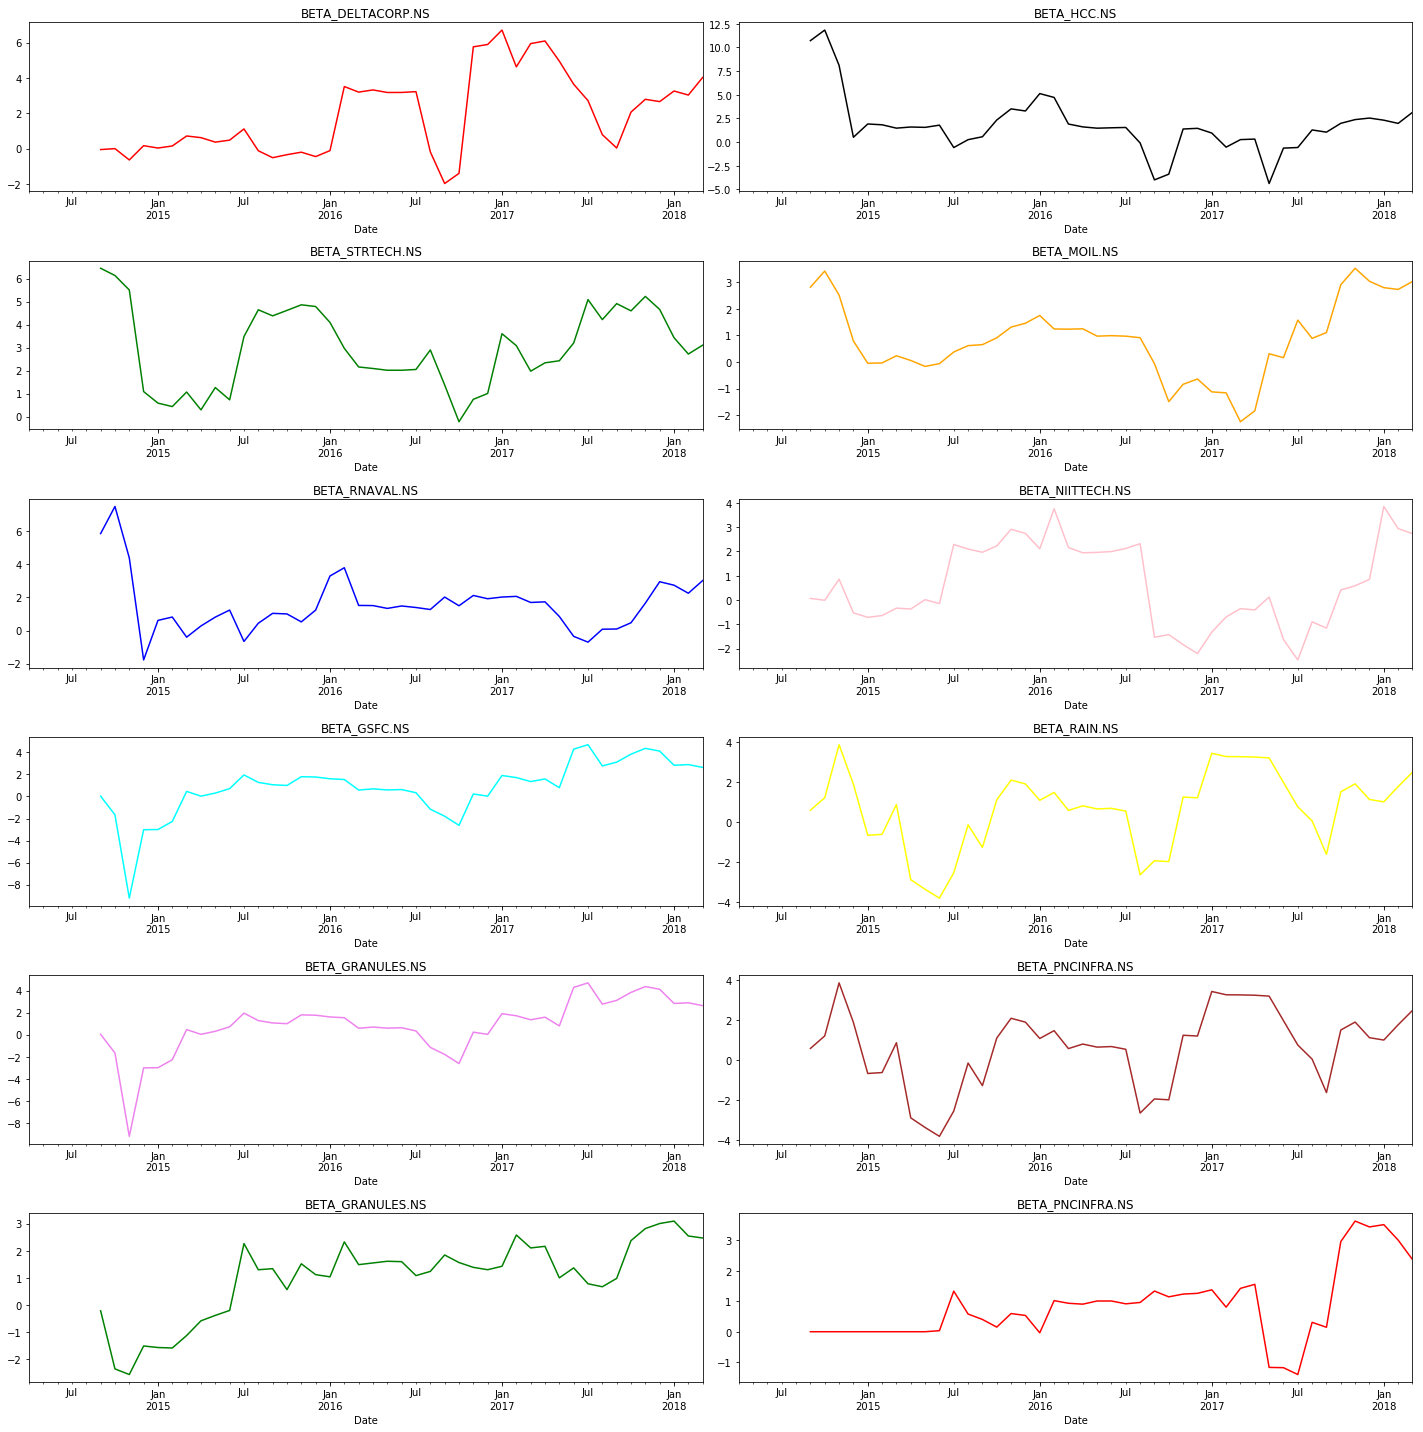

In [10]:
##################### DRAW THE BETAS OF TOP 10 ############################################################
fig, axes = plt.subplots(nrows=6, ncols=2,figsize = (20,20))
PortfolioB[betas.index[0]].plot(ax=axes[0,0],color='red');axes[0,0].set_title(betas.index[0])
PortfolioB[betas.index[1]].plot(ax=axes[0,1],color='black');axes[0,1].set_title(betas.index[1])
PortfolioB[betas.index[2]].plot(ax=axes[1,0],color='green');axes[1,0].set_title(betas.index[2])
PortfolioB[betas.index[3]].plot(ax=axes[1,1],color='orange');axes[1,1].set_title(betas.index[3])
PortfolioB[betas.index[4]].plot(ax=axes[2,0],color='blue');axes[2,0].set_title(betas.index[4])
PortfolioB[betas.index[5]].plot(ax=axes[2,1],color='pink'); axes[2,1].set_title(betas.index[5])
PortfolioB[betas.index[6]].plot(ax=axes[3,0],color='cyan'); axes[3,0].set_title(betas.index[6])
PortfolioB[betas.index[7]].plot(ax=axes[3,1],color='yellow'); axes[3,1].set_title(betas.index[7])
PortfolioB[betas.index[6]].plot(ax=axes[4,0],color='violet'); axes[4,0].set_title(betas.index[8])
PortfolioB[betas.index[7]].plot(ax=axes[4,1],color='brown'); axes[4,1].set_title(betas.index[9])
PortfolioB[betas.index[8]].plot(ax=axes[5,0],color='green'); axes[5,0].set_title(betas.index[8])
PortfolioB[betas.index[9]].plot(ax=axes[5,1],color='red'); axes[5,1].set_title(betas.index[9])
fig.tight_layout()

plt.show()

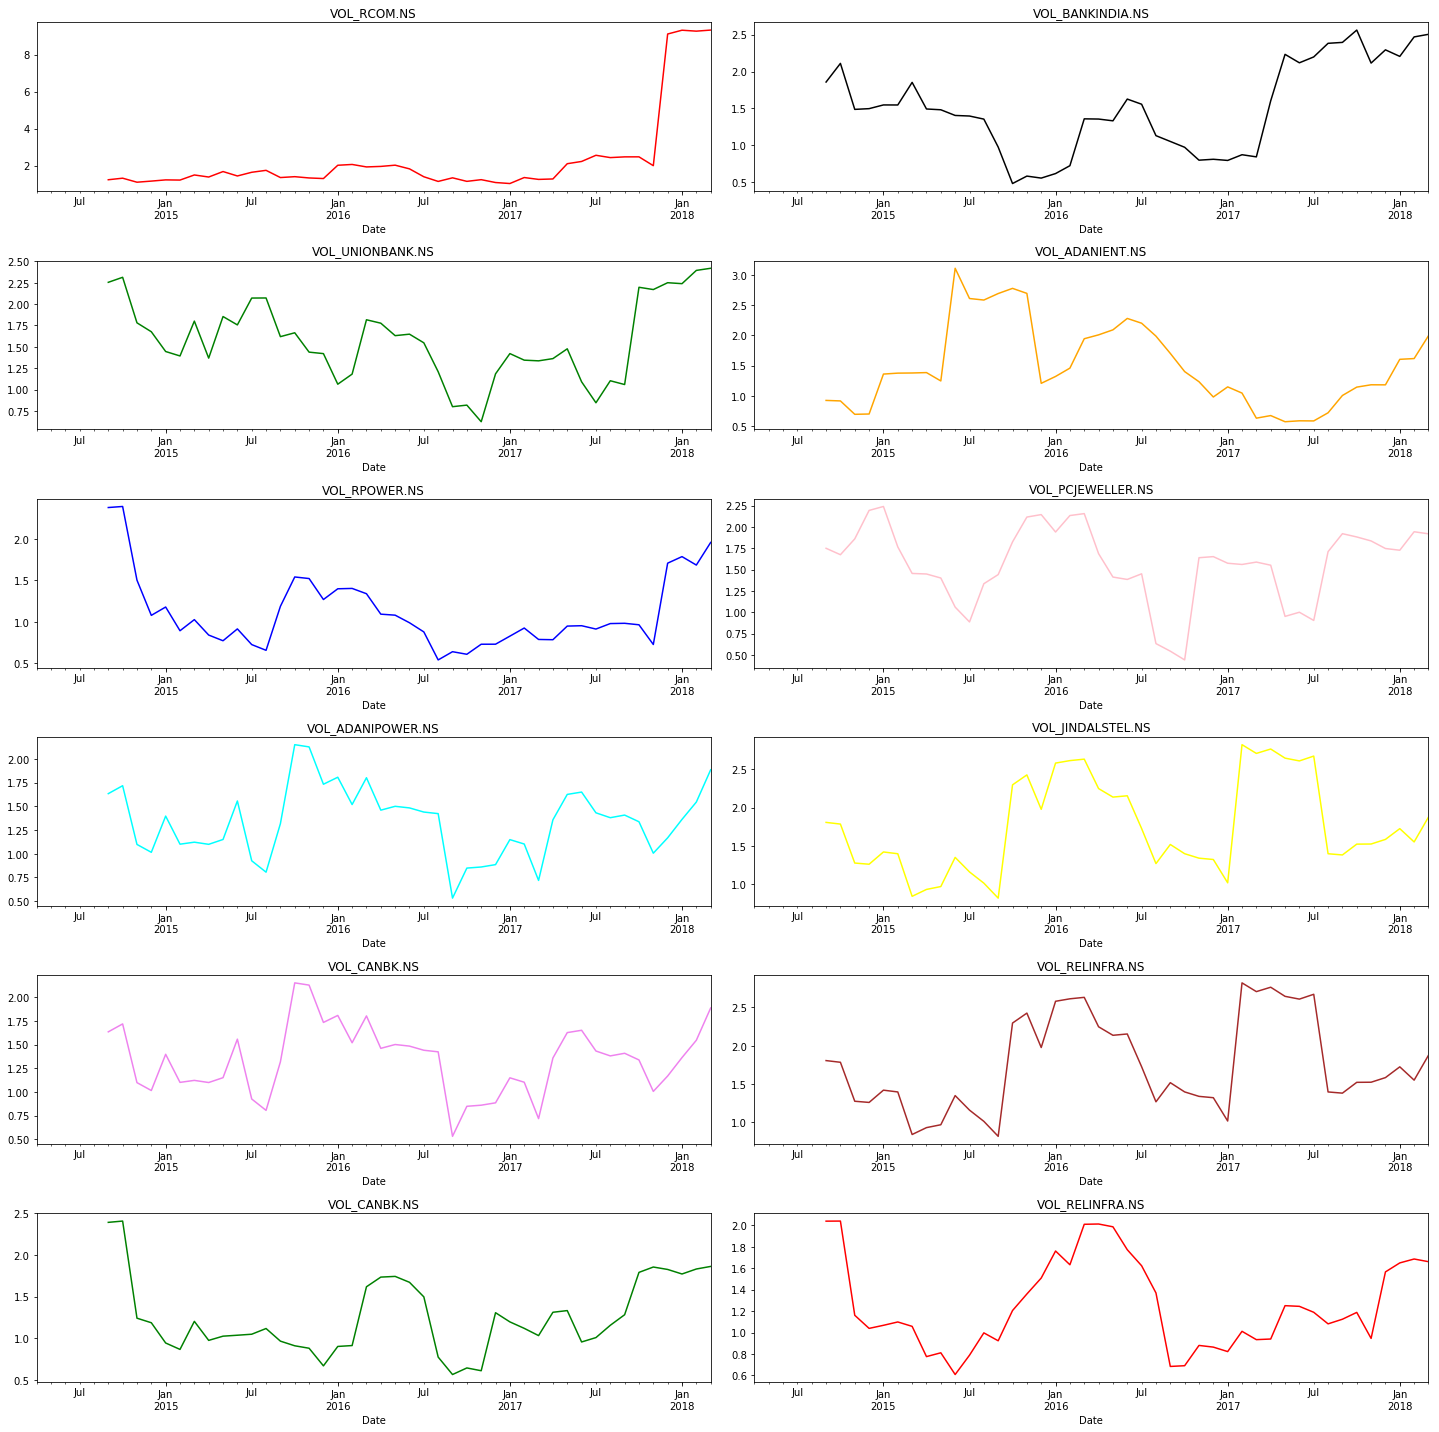

In [11]:
fig, axes = plt.subplots(nrows=6, ncols=2,figsize = (20,20))
PortfolioV[Vols.index[0]].plot(ax=axes[0,0],color='red');axes[0,0].set_title(Vols.index[0])
PortfolioV[Vols.index[1]].plot(ax=axes[0,1],color='black');axes[0,1].set_title(Vols.index[1])
PortfolioV[Vols.index[2]].plot(ax=axes[1,0],color='green');axes[1,0].set_title(Vols.index[2])
PortfolioV[Vols.index[3]].plot(ax=axes[1,1],color='orange');axes[1,1].set_title(Vols.index[3])
PortfolioV[Vols.index[4]].plot(ax=axes[2,0],color='blue');axes[2,0].set_title(Vols.index[4])
PortfolioV[Vols.index[5]].plot(ax=axes[2,1],color='pink'); axes[2,1].set_title(Vols.index[5])
PortfolioV[Vols.index[6]].plot(ax=axes[3,0],color='cyan'); axes[3,0].set_title(Vols.index[6])
PortfolioV[Vols.index[7]].plot(ax=axes[3,1],color='yellow'); axes[3,1].set_title(Vols.index[7])
PortfolioV[Vols.index[6]].plot(ax=axes[4,0],color='violet'); axes[4,0].set_title(Vols.index[8])
PortfolioV[Vols.index[7]].plot(ax=axes[4,1],color='brown'); axes[4,1].set_title(Vols.index[9])
PortfolioV[Vols.index[8]].plot(ax=axes[5,0],color='green'); axes[5,0].set_title(Vols.index[8])
PortfolioV[Vols.index[9]].plot(ax=axes[5,1],color='red'); axes[5,1].set_title(Vols.index[9])
fig.tight_layout()

plt.show()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr




selected =[]

for i in range(midcap_no_of_stocks):
    selected.append(Vols.index[i][4:])

for i in range(largecap_no_of_stocks):
    selected.append(betas.index[i][5:])
    
for i in range(sensex_no_of_stocks):
    selected.append(Beta1.index[i][5:])


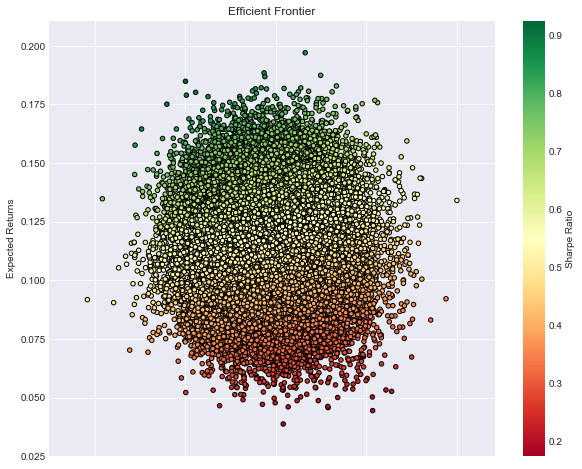

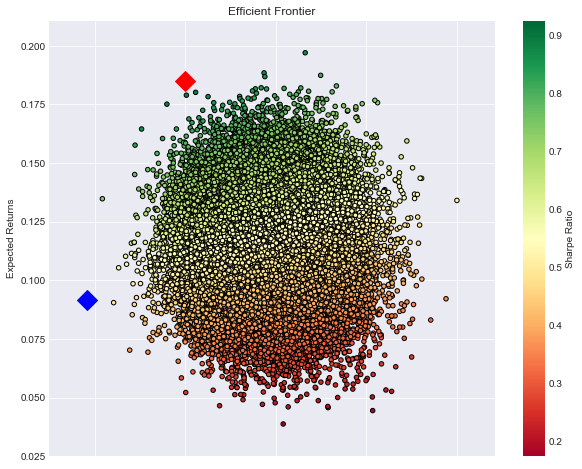

TWO PORTFOLIOS WITH MAX SHARPE RATIO AND MIN VOLATILITY
                  19623
Returns        0.091765
Volatility     0.178387
Sharpe Ratio   0.514416
RCOM.NS        0.003052
BANKINDIA.NS   0.049297
UNIONBANK.NS   0.017190
ADANIENT.NS    0.010420
RPOWER.NS      0.051608
DELTACORP.NS   0.060528
HCC.NS         0.066437
STRTECH.NS     0.012552
MOIL.NS        0.001444
RNAVAL.NS      0.004459
PNB.NS         0.014948
BHEL.NS        0.022164
ICICIBANK.NS   0.040201
SBIN.NS        0.073068
GAIL.NS        0.037627
VEDL.NS        0.069688
ONGC.NS        0.068229
IDEA.NS        0.069600
RELIANCE.NS    0.004742
HINDALCO.NS    0.042976
TATASTEEL.NS   0.010233
SUNPHARMA.NS   0.010481
BANKBARODA.NS  0.026739
TCS.NS         0.001157
BPCL.NS        0.073225
LUPIN.NS       0.055244
ULTRACEMCO.NS  0.071256
LT.NS          0.020981
BHARTIARTL.NS  0.006655
AXISBANK.NS    0.003799
                  11838
Returns        0.184844
Volatility     0.200051
Sharpe Ratio   0.923985
RCOM.NS        0.000443
BANKINDI

In [15]:
## load prices for the stocks mentioned, into a pandas panel.
table = pdr.get_data_yahoo(selected,start_time,end_time)


table= table['Close'] # load all the closing prices this will be retirned as a pandas dataframwe.

table = table.sort_index(ascending = True) # as the prices are in descending order
# add additional returns coloums to the dataframe one for rach stock and compute returns

table = table.dropna(how='all') # drop teh rows if price is zero


# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    #portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]
    portfolio[symbol] = [Weight[counter] for Weight in stock_weights]
# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
#column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()
# print the details of the 2 special portfolios

print("TWO PORTFOLIOS WITH MAX SHARPE RATIO AND MIN VOLATILITY")
print(min_variance_port.T)
print(sharpe_portfolio.T)


C:\Users\krishnan.ramchandran\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


-------------------COMPUTNG MAX DRAWDOWN-----------------------------


C:\Users\krishnan.ramchandran\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: pd.rolling_max is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,min_periods=1,center=False).max()
C:\Users\krishnan.ramchandran\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:68: FutureWarning: pd.rolling_min is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,min_periods=1,center=False).min()


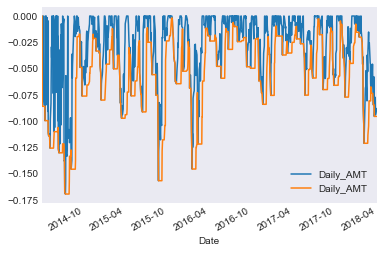

----------------COMPUTING ALPHA AND BETA FOR PORTFOLIO------------
PORTFOLIO BETA= 1.34976729678 PORTFOLIOALPHA= 0.0599462294192 PORTFOLIOVOLATILITY= 0.369733411279 MOMENTUM= -0.118433748245
----------------PORTFOLIO RETURNS----------------------------
----------------PORTFOLIO RETURNS-----ANNUALISED---%--------------------
21.072261055761693
------------PORTFOLIO SHARPE RATIO---------
0.569931210243
Annualised Portfolio Shape = 0.569931210243


In [16]:
My_table = pdr.get_data_yahoo(selected,start_time,end_time)


My_table= My_table['Close'] # load all the closing prices this will be retirned as a pandas dataframwe.

My_table = My_table.sort_index(ascending = True) # as the prices are in descending order
# add additional returns coloums to the dataframe one for rach stock and compute returns

#My_table = My_table.dropna(how='all') # drop teh rows if price is zero


# calculate daily and annual returns of the stocks
My_Portfolio_Returns = My_table.pct_change()

My_Portfolio_Returns= My_Portfolio_Returns.fillna(0)

# ###########################COMPUTING KEY PORTFOLIO STATS , ALPHA/ BETA/ DRAWDOWN##

Weights= []
Stockamounts = []
#drop the first three rows , sharpe, returns and volatility
min_sharpe_portfolio = sharpe_portfolio.T[3:]
min_sharpe_portfolio.index.names= ['SYMBOL']
#Betas.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
min_sharpe_portfolio.columns= ['WEIGHT']

## get all the weights for the stocks listed#######################################
for idx, val in enumerate(selected):
    Weights.append(min_sharpe_portfolio.get_value(val,'WEIGHT'))

for idx, val in enumerate(selected):
    Stockamounts.append(val+"_AMT")


# = [5/10,3/10,2/10] #Nifty allocate teh initial value by each stock.
Amount = 100000000 # 100 million
Allocation_Value = [i * Amount for i in Weights]

#My_Portfolio_Returns = returns_daily
#My_Portfolio_Returns.fillna(0)
numofrows = len(My_Portfolio_Returns)

for id,col_name in enumerate(Stockamounts):# Add portfolio value coloumns and initiatlise to 0
    My_Portfolio_Returns[col_name] = 0                                    


for z in range(0,numofrows):
    if(z==0): #Fiets row will have initial portfolio value
                ### Put a for loop here for looping through the various stocks and initiatising the  values
        for id,col_name in enumerate(Stockamounts):# allocate starting portfolio balance divinde equally for 10 st
            My_Portfolio_Returns[col_name].iloc[z] = Allocation_Value[id]                                    
    else:
        for id,col_name in enumerate(Stockamounts):# compute portfolio value for each stock.Todays returns * yesterdays value
            My_Portfolio_Returns[col_name].iloc[z] = (1+My_Portfolio_Returns[selected[id]].iloc[z])*My_Portfolio_Returns[col_name].iloc[z-1]
                        


My_Portfolio_Returns['Daily_AMT'] = My_Portfolio_Returns.sum(axis=1)

My_Portfolio_Returns['AMT_CHANGE'] = My_Portfolio_Returns['Daily_AMT'].pct_change().fillna(0)

print("-------------------COMPUTNG MAX DRAWDOWN-----------------------------")
Roll_Max = pd.rolling_max(My_Portfolio_Returns['Daily_AMT'], 12, min_periods=1)
Daily_Drawdown = My_Portfolio_Returns['Daily_AMT']/Roll_Max - 1.0

# Next we calculate the minimum (negative) daily drawdown in that window.
# Again, use min_periods=1 if you want to allow the expanding window
Max_Daily_Drawdown = pd.rolling_min(Daily_Drawdown, 12, min_periods=1)

# Plot the results
#SPY_Dat['Adj Close'].plot( )
Daily_Drawdown.plot()
Max_Daily_Drawdown.plot()
plt.legend()
plt.show()

print("----------------COMPUTING ALPHA AND BETA FOR PORTFOLIO------------")
#My_Portfolio_Returns['Daily_AMT'].plot(grid=True)
#plt.legend()

# compute returns
Index = pdr.get_data_yahoo("^NSEI",start_time,end_time)
Index['Rets'] = Index['Close'].pct_change().fillna(0)


#covmat = np.cov(Index['Rets'],My_Portfolio_Returns['AMT_CHANGE'][1:])
My_Portfolio_Returns= My_Portfolio_Returns[My_Portfolio_Returns.index.isin(Index.index)]
covmat = np.cov(My_Portfolio_Returns['AMT_CHANGE'][1:],Index['Rets'][1:])

# calculate measures now

beta = covmat[0,1]/covmat[1,1]      
alpha= np.mean(My_Portfolio_Returns['AMT_CHANGE'])-beta*np.mean(Index['Rets'])

volatility = np.sqrt(covmat[0,0])
momentum = np.prod(1+My_Portfolio_Returns['AMT_CHANGE'].tail(22).values) -1

# annualize the numbers
prd = 252. # used monthly returns; 12 periods to annualize
alpha = alpha*252
volatility = volatility*np.sqrt(prd)

print ("PORTFOLIO BETA=",beta,"PORTFOLIOALPHA=",alpha, "PORTFOLIOVOLATILITY=", volatility,"MOMENTUM=", momentum)

print("----------------PORTFOLIO RETURNS----------------------------")
My_Portfolio_Returns['Daily_AMT'].plot(grid=True)
plt.legend()
Returns = (My_Portfolio_Returns['AMT_CHANGE'].mean()*250)## Annulaise returns

print("----------------PORTFOLIO RETURNS-----ANNUALISED---%--------------------")
print(Returns*100)


print("------------PORTFOLIO SHARPE RATIO---------")
Returns = (My_Portfolio_Returns['AMT_CHANGE'].mean()*250)## Annulaise returns

Sharpe = Returns/ volatility

print(Sharpe)

print("Annualised Portfolio Shape =", Sharpe)